## 01Demo: Yeast Segmentation

In [1]:
import sys
import os
sys.path.append("../")

import yaml
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

from config_yml import ExperimentOptions
from trainer.train import DeepCellModule
from postprocess.post_process_utils import post_process_panoptic

%load_ext autoreload
%autoreload 2

2023-01-26 11:17:04.185480: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 11:17:04.800950: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-26 11:17:16.255566: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /dcsrsoft/spack/arolle/v1.0/spack/opt/spack/linux-rhel8-zen/gcc-8.4.1/gcc-10.4.0-7fjdev7tbifqfonsjwlqmr6qcnza2ezu/lib64:/dcsrsoft/spack/arolle/v1.0/spack/opt/spack/linux-rhel8-zen/gcc-8.4.1/gcc-10.4.0-7fjdev7tbif

### 01. Config

In [2]:
mode = 'test' #train, evl, test
model_dir = "../../model_dir/deepyeast_001/"
config_path = "../configs/config_wl.yaml"
num_gpus=1

### 02. Load Model

In [3]:
with open(config_path, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
configs = ExperimentOptions(config)
configs.model_options.backbone.drop_path_keep_prob=1

cellmodel = DeepCellModule(mode, model_dir, configs, num_gpus)

2023-01-26 11:18:02.421670: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 11:18:03.862514: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38224 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:21:00.0, compute capability: 8.0


restoring or initializing model...
restored model from ../../model_dir/deepyeast_001/ckpt-100000.
restored from checkpoint: ../../model_dir/deepyeast_001/ckpt-100000


### 03. Read Image

Test your picture here

In [4]:
file_path = "../../../data/Sj_MATECHOICE/20220524_yGL0154xyGL0360_VACfiltered_12_snapshot_R3D.dv_Composite.tif"
img = imread(file_path)

### 04. Prediction

In [5]:
%%time
output = cellmodel.predict(img[:,:,2])

2023-01-26 11:18:17.403865: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2023-01-26 11:18:25.181824: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-26 11:18:25.567738: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


CPU times: user 7.3 s, sys: 1.77 s, total: 9.07 s
Wall time: 39.5 s


### 05. Plot result

In [8]:
post_ouput = output["panoptic_pred"][0].numpy()
post_ouput = post_process_panoptic(post_ouput)

KeyboardInterrupt: 

In [37]:
imsave(os.path.join("../../../output/sj", os.path.basename(file_path)), post_ouput)

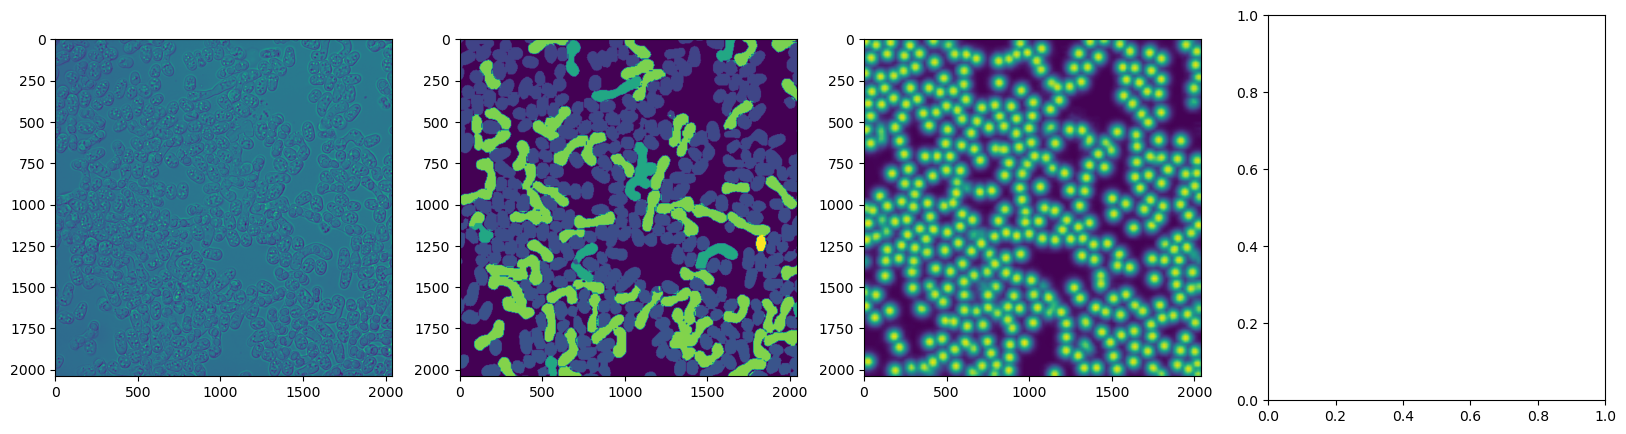

In [9]:
figs, axs = plt.subplots(1,4, figsize=(20,5))
axs[0].imshow(img[:,:,2])
axs[1].imshow(output['panoptic_pred'][0])
axs[2].imshow(output['center_heatmap'][0])
# axs[3].imshow(post_ouput)

In [10]:
import tensorflow as tf

In [11]:
signatures = cellmodel.__call__.get_concrete_function(cellmodel.get_input_spec())

In [12]:
tf.saved_model.save(cellmodel, "../../model_dir/save2/", signatures=signatures)

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


INFO:tensorflow:Assets written to: ../../model_dir/save2/assets


INFO:tensorflow:Assets written to: ../../model_dir/save2/assets


In [13]:
aaa = tf.saved_model.load("../../model_dir/save2/")

In [10]:
image = img[:,:,2]

In [14]:
output = aaa(tf.cast(image.reshape(image.shape[0], image.shape[1], 1), dtype=tf.uint16))

NameError: name 'image' is not defined